In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'AppleGothic'

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [62]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88955  100 88955    0     0   324k      0 --:--:-- --:--:-- --:--:--  339k
curl: (6) Could not resolve host: weather.csv


In [78]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [80]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
missing_data = weather[weather['최대 풍속'].isna()]
print(missing_data )

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2019-04-19    7.8    NaN    2.3


In [81]:
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean()
weather.fillna(mean_wind, inplace=True)
weather.loc['2012-02-11']

평균 기온   -0.700000
최대 풍속    3.936441
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64

In [82]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
# 3.1 데이터프레임 평탄화
weather.reset_index(inplace=True)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


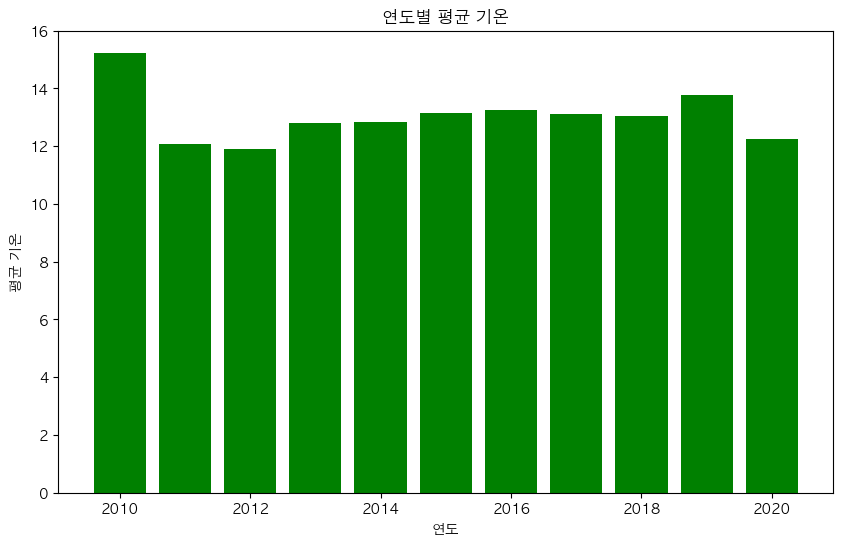

In [83]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [84]:
yearly_temp

year
2010    15.238562
2011    12.073425
2012    11.892896
          ...    
2018    13.041644
2019    13.767671
2020    12.233333
Name: 평균 기온, Length: 11, dtype: float64

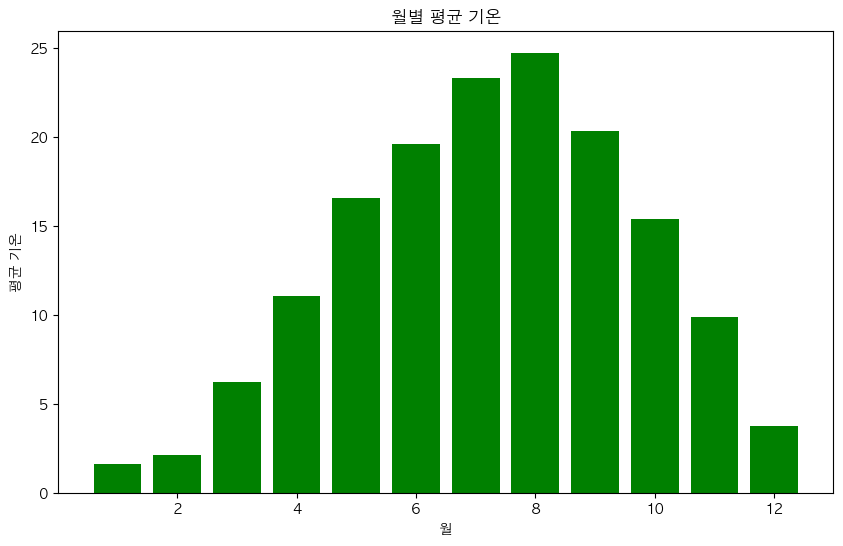

In [85]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.179892  3.946676
3       6.250323  8.871935  4.388827
...          ...       ...       ...
10     15.383871  7.766774  3.961613
11      9.889667  8.013333  3.930667
12      3.753548  8.045484  3.817097

[12 rows x 3 columns]


Text(0, 0.5, '평균 풍속')

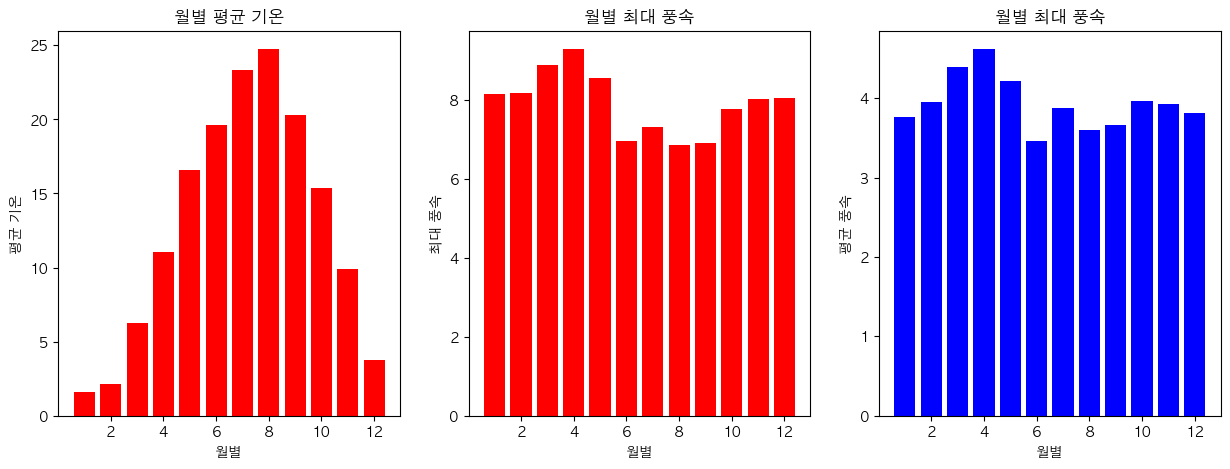

In [86]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
print(monthly_means)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

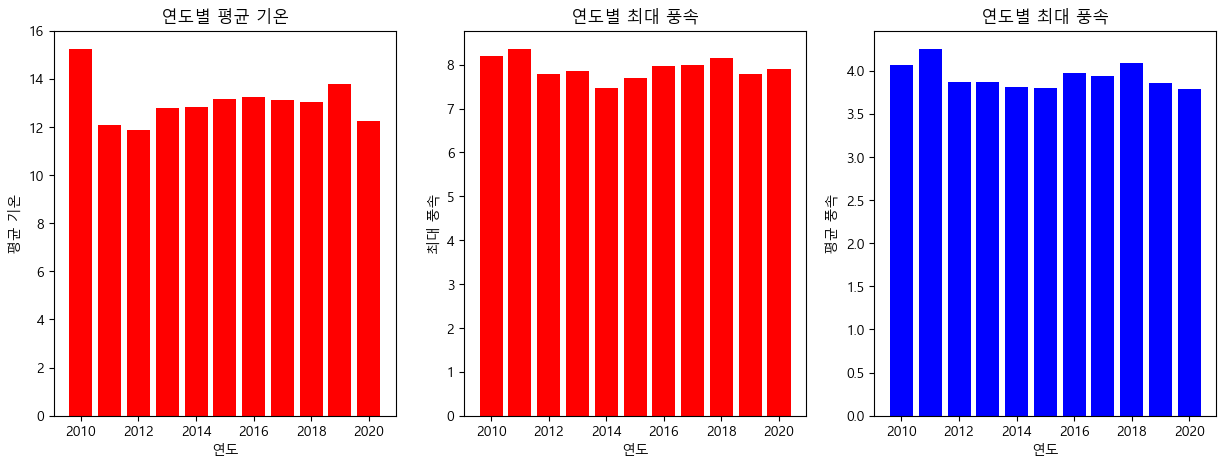

In [21]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [25]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [87]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

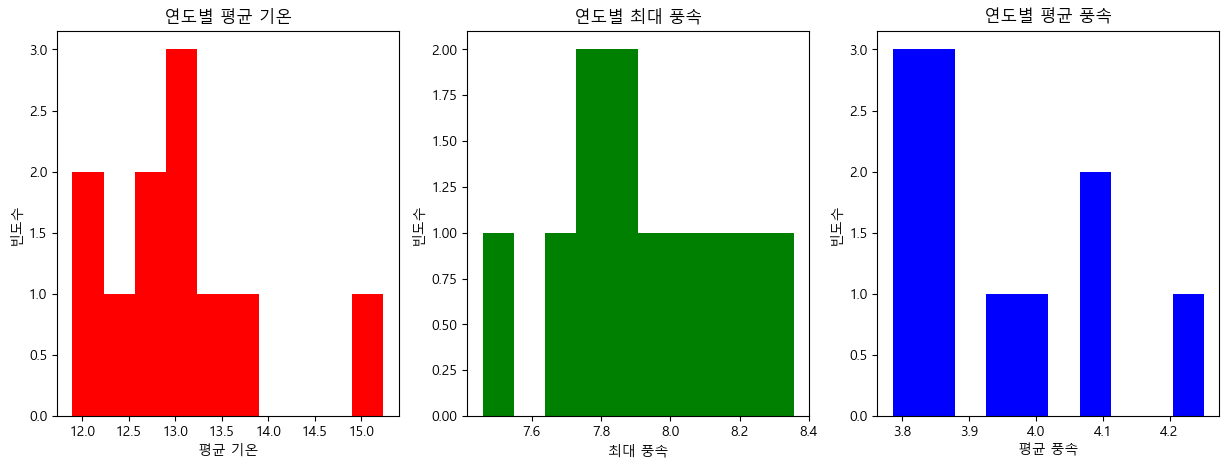

In [27]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


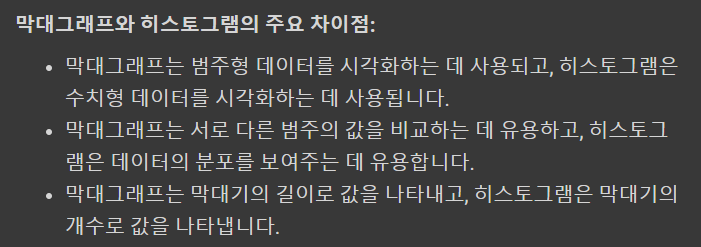

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'AppleGothic'
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

weather = pd.read_csv("weather.csv", index_col = 0)
weather

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
...,...,...,...
2020-07-29,21.6,3.2,1.0
2020-07-30,22.9,9.7,2.4
2020-07-31,25.7,4.8,2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [178]:
df1 = weather.loc['2015-06-06']
df1

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06, dtype: float64

## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [135]:
df2 = weather['평균 기온'].idxmax()
weather.loc[df2]

평균 기온    31.3
최대 풍속     7.8
평균 풍속     4.6
Name: 2013-08-08, dtype: float64

## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [32]:
df3 = weather[weather['평균 기온']>30]
df3

,평균 기온,최대 풍속,평균 풍속
일시,,,
2013-08-08,31.3,7.8,4.6
2013-08-09,30.6,9.9,6.4
2013-08-10,30.6,7.4,3.8
2018-07-23,30.5,6.5,1.6
2018-08-04,30.3,5.8,3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

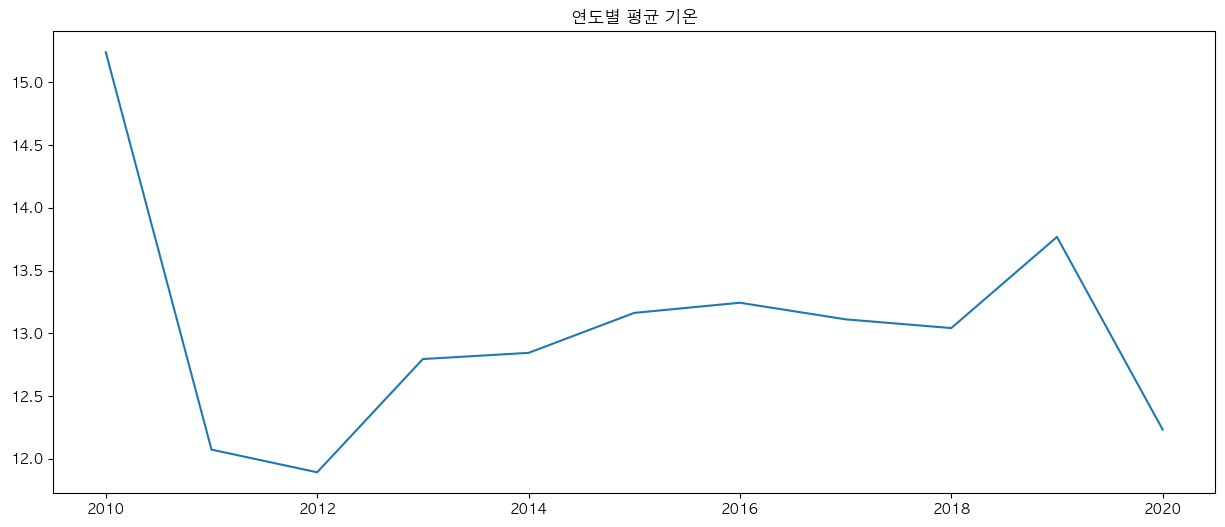

In [192]:
#평탄화
weather.reset_index(inplace=True)

# year칼럼 추가/
weather['year'] = pd.DatetimeIndex(weather['일시']).year

plt.plot(weather.groupby('year')['평균 기온'].mean())
plt.title('연도별 평균 기온')
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

<BarContainer object of 11 artists>

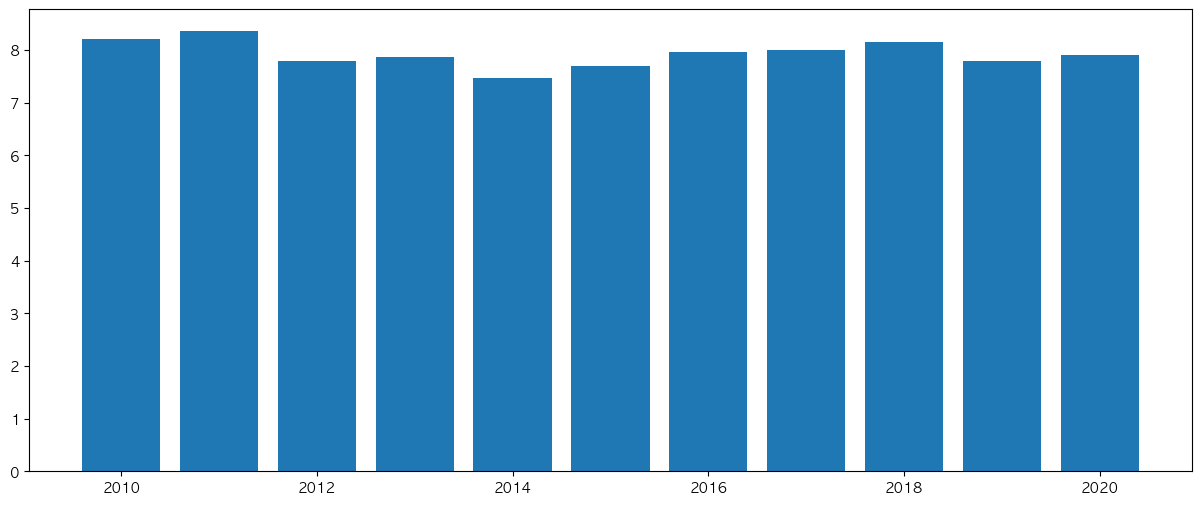

In [137]:
plt.bar(np.arange(2010,2021), weather.groupby('year')['최대 풍속'].mean())

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


(array([1., 1., 0., 0., 0., 0., 0., 0., 7., 2.]),
 array([ 622.6 ,  715.51,  808.42,  901.33,  994.24, 1087.15, 1180.06,
        1272.97, 1365.88, 1458.79, 1551.7 ]),
 <BarContainer object of 10 artists>)

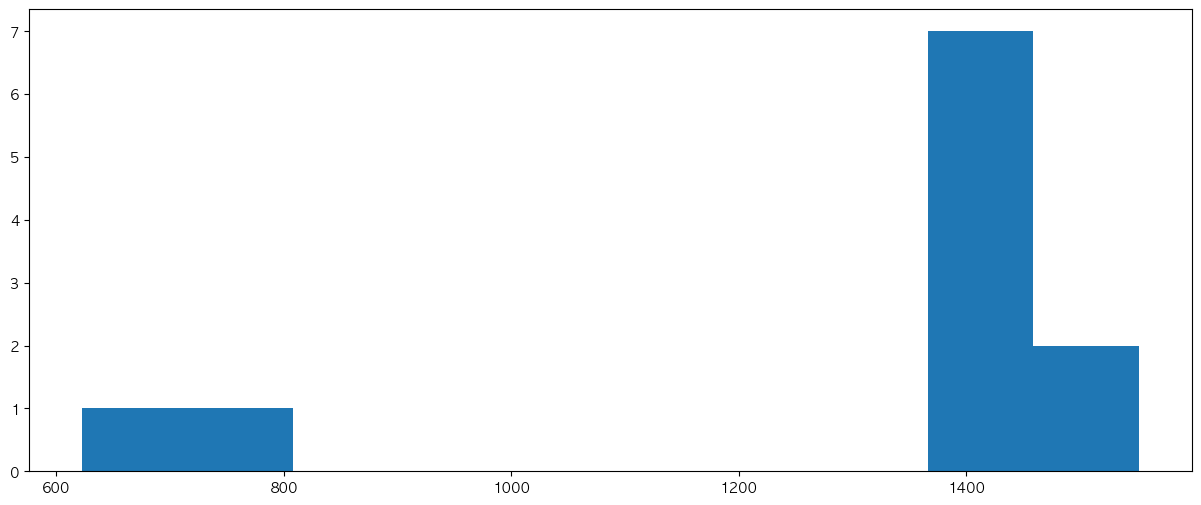

In [138]:
plt.hist(weather.groupby('year')['평균 풍속'].sum())

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [195]:
yeardata = weather.groupby('year')['평균 기온'].mean()

print(f'2015년의 평균기온은 {data.loc[2015]},\n2016년의 평균기온은 {data.loc[2016]}이므로')

if (yeardata.loc[2015]>yeardata.loc[2016]):
    print(2015,'년이 더 더웠다.')
else :
    print(2016,'년이 더 더웠다.')

2015년의 평균기온은 13.162465753424659,
2016년의 평균기온은 13.243442622950822이므로
2016 년이 더 더웠다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [190]:
weather.reset_index(inplace=True)
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthdata = weather.groupby('month')['평균 기온'].sum()
print(f'월별 평균기온의 합이 가장 적은 달 {monthdata.idxmin()}월, 가장 많은 달 {monthdata.idxmax()}월')

월별 평균기온의 합이 가장 적은 달 1월, 가장 많은 달 8월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [196]:
print(f'연도별 최대풍속의 평균이 가장 큰 년도는 {weather.groupby('year')['최대 풍속'].mean().idxmax()}년')

연도별 최대풍속의 평균이 가장 큰 년도는 2011년
